- Kütüphanleri import etme.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verilerin sayacı için Counter kullanıcaz.
from collections import Counter

# DeprecationWarning gibi uygulamanın çalışmasını engellemeyen hataları Ignore luycaz
import warnings


warnings.filterwarnings("ignore")

- Verileri İçeri Aktarma

In [2]:
df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Veri Hakkında Bilgi
- Bu bölümde veri içerisinde bulunan her bir sütun içerisinde kaç adet örnek var, bu verilerin tipleri nedir ve veri tiplerinin dağılımı nedir gibi veriyi tanımaya yönelik soruları cevaplayacağız.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Verinin Temizlenmesi
- Sütun isimlerinin düzenlenmesi.
- Yararsız verinin çıkarılması ve düzenlenmesi.
- Kayıp veri sorunu.

### Verilerin Temizlenmesi -> Sütun İsimlerinin Düzenlenmesi
- Bu bölümde veri içerisinde bulunan sütun isimlerini inceleyeceğiz ve bu isimleri Türkçeye çevireceğiz.

In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
df.rename(columns={"ID":"id", "Name":"isim", "Sex":"cinsiyet", "Age":"yas", "Height":"boy",
                   "Weight":"kilo", "Team":"takim", "NOC":"uok", "Games":"oyunlar", "Year":"yil",
                   "Season":"sezon", "City":"sehir", "Sport":"spor", "Event":"etkinlik", "Medal":"madalya"}, inplace=True)

In [6]:
df.head()

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Verilerin Temizlenmesi -> Yararsız Verinin Çıkarılması ve Düzenlenmesi
- **id** sütunu veri hakkında herhangi bir bilgi vermediği için çıkarılacaktır.
- **oyunlar** sütunu **yıl** ve **sezon** sütunlarının birleşimi olduğu için tercihen çıkarılabilir.

In [7]:
df.drop(["id","oyunlar"], axis=1, inplace=True)
df.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


## Verilerin Temizlenmesi -> Kayıp Veri Sorunu
Kayıp veri kavramı veri içerisinde bulunan örneğin herhangi bir sütunda bulunan değerin olmaması anlamına gelir.
- Kayıp Veri ile Mücadele etmek için;
- 1. Kayıp veriye ait örnekler veriden çıkarılabilir.
- 2. Kayıp veriler asıl verilerin dağılımını bozmayacak şekilde ortalama veya medyan ile doldurulabilir.
- Bu veri seti üzerinde çalışma yaparken;
- 1. Boy ve Kilo sütununda bulunanları etkinlik ortalamasına göre dolduracağız.
- 2. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
- 3. Madalya alamayan sporcuları çıkaracağız.

In [8]:
# Boy ve Kilo Sütunu Kayıp Veri Doldurma


In [9]:
df.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [42]:
df['kilo'] = df['kilo'].fillna(df.groupby('etkinlik')['kilo'].transform('mean'))
df['boy'] = df['boy'].fillna(df.groupby('etkinlik')['boy'].transform('mean'))



etkinlik
Weightlifting Men's Super-Heavyweight             139.194444
Wrestling Men's Super-Heavyweight, Freestyle      121.333333
Wrestling Men's Super-Heavyweight, Greco-Roman    120.748800
Judo Men's Heavyweight                            120.370145
Weightlifting Women's Super-Heavyweight           117.733333
                                                     ...    
Gymnastics Women's Team All-Around                 46.487866
Rhythmic Gymnastics Women's Individual             45.996148
Athletics Women's 5,000 metres                     45.777778
Gymnastics Women's Balance Beam                    45.621858
Gymnastics Women's Uneven Bars                     44.884981
Name: kilo, Length: 756, dtype: float64

In [11]:
df["kilo"].fillna(df["kilo"].mean(), inplace=True)
df["boy"].fillna(df["boy"].mean(), inplace=True)

In [12]:
df[["boy","kilo"]].isna().sum()

boy     0
kilo    0
dtype: int64

In [13]:
df.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Yaş sütununu doldurma

In [14]:
df["yas"].fillna(df["yas"].mean(), inplace=True)

In [15]:
df["yas"].isnull().any()

False

In [16]:
df.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [17]:
df.info()
# Şuan tüm NaN değerleri doldurduk.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


## Madalya Alamayan Sporcuları Veri Setinden Çıkartma

In [18]:
df["madalya"].isnull().sum()
# 231333 adet boş değer var.

231333

In [19]:
df = df[~df["madalya"].isna()]

In [20]:
df.head()
# İndexleri düzeltme

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.000000,75.000000,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [21]:
df.reset_index()

,index,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,37,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,38,Arvo Ossian Aaltonen,M,30.0,177.000000,75.000000,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,40,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,41,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.000000,80.000000,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.000000,80.000000,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,271082,Bogusaw Zych,M,28.0,182.000000,82.000000,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,271102,Olesya Nikolayevna Zykina,F,19.0,171.000000,64.000000,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


## Tek Değişkenli Veri Analizi

#### Sayısal Değişkenler
- Veri içerisinde 4 adet sayısal değişken bulunmaktadır bunlar:
- 1. yas
- 2. boy
- 3. kilo
- 4. yil
- Sayısal değişkenleri incelemek ve yorumlamak için veri sıklığı ve temel istatistik bilgileri kullanacağız.
- Veri sıklığı bilgilerini histogram grafiği sayesinde inceleyeceğiz.
- Temel istatistik bilgilerini ise kutu grafiği sayesinde yorumlayacağız.

In [22]:
def plotHistogram(degisken):
    """
        Girdi: Değişken Sütun İsmi
        Çikti: Histogram Grafiği
    """
    
    plt.figure()
    plt.hist(df[degisken], bins=85, color="purple")
    plt.title(f"{degisken} - Histogram Grafiği")
    plt.grid()
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.show()

In [23]:
num_cols = [col for col in df.columns if df[col].dtype in ("int", "float")]
num_cols

['yas', 'boy', 'kilo', 'yil']

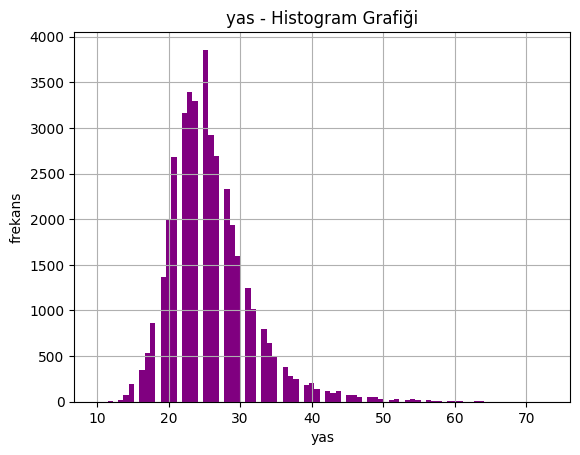

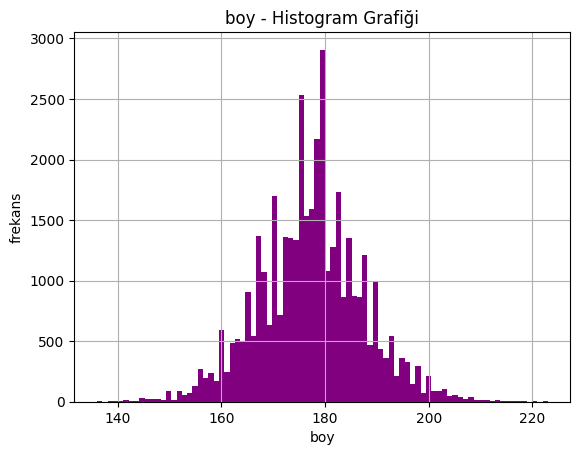

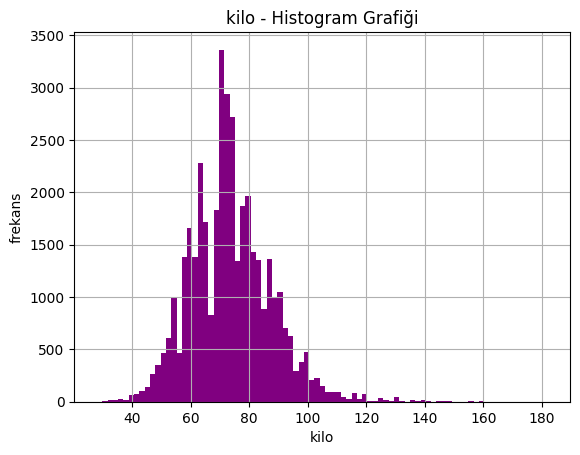

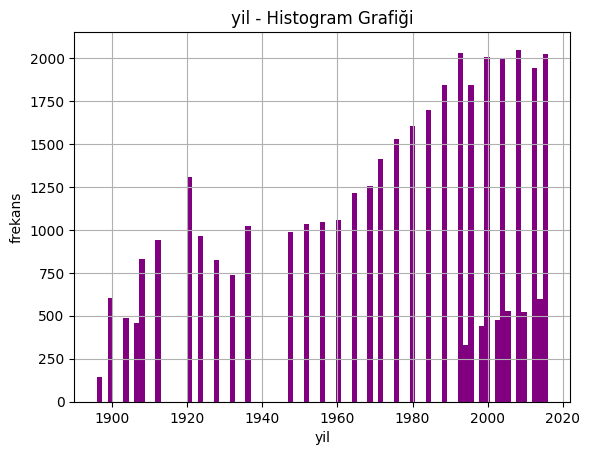

In [24]:
for col in num_cols:
    plotHistogram(col)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,39783.0,25.918399,5.859573,10.0,22.0,25.000000,29.0,73.0
boy,39783.0,177.338067,10.169931,136.0,170.0,177.480339,184.0,223.0
kilo,39783.0,73.753280,13.975866,28.0,64.0,73.000000,82.0,182.0
yil,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.000000,2002.0,2016.0


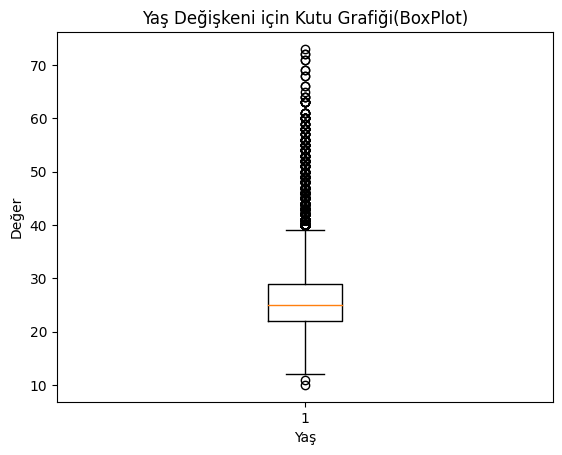

In [26]:
plt.boxplot(df.yas)
plt.title("Yaş Değişkeni için Kutu Grafiği(BoxPlot)")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

## Kategorik Değişkenler

In [27]:
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['isim',
 'cinsiyet',
 'takim',
 'uok',
 'sezon',
 'sehir',
 'spor',
 'etkinlik',
 'madalya']

In [28]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/Sütun ismi
               n = En önemli n unique değer
        Çikti: Bar Grafiği
    """


    data = df[degisken].value_counts()[:n]
    
    plt.figure()
    plt.bar(data.index, data, color="green")
    plt.xticks(data.index, data.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title(f"Veri Frekansi: {degisken}")
    plt.show()
    

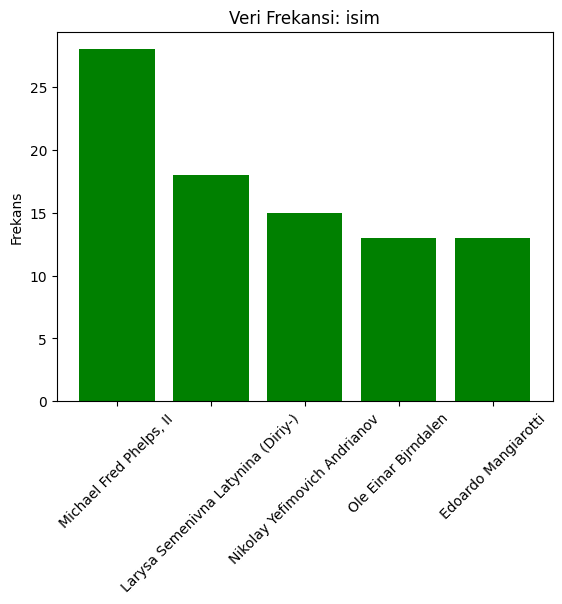

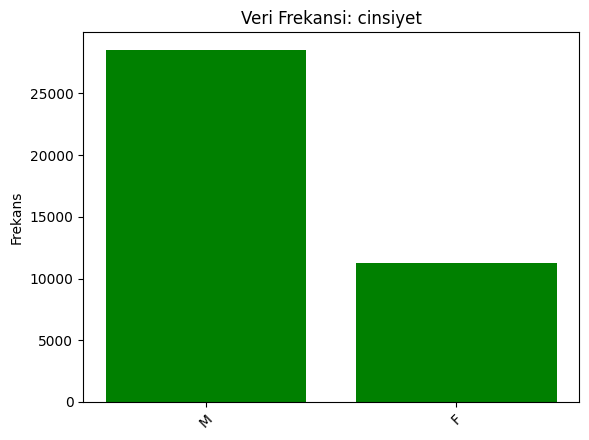

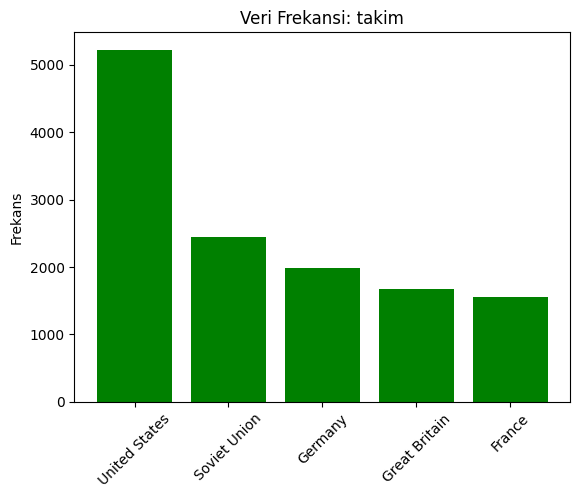

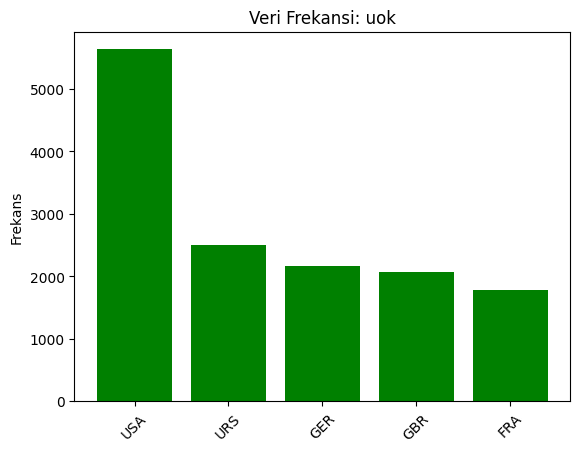

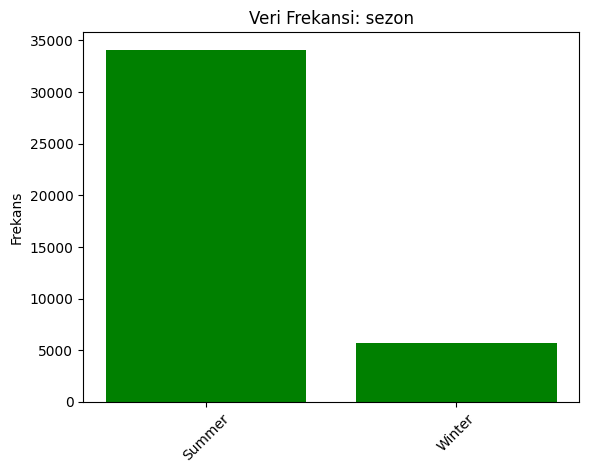

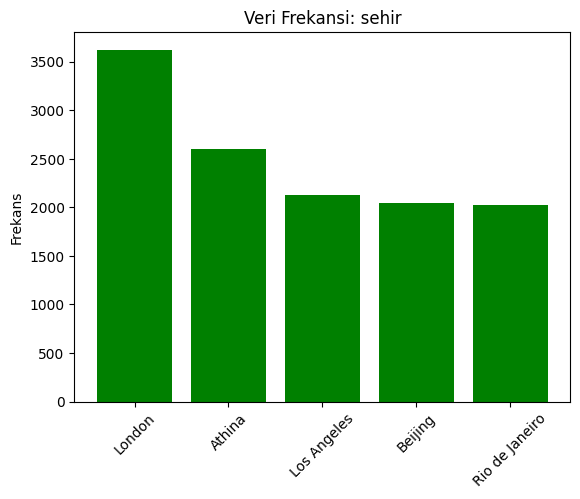

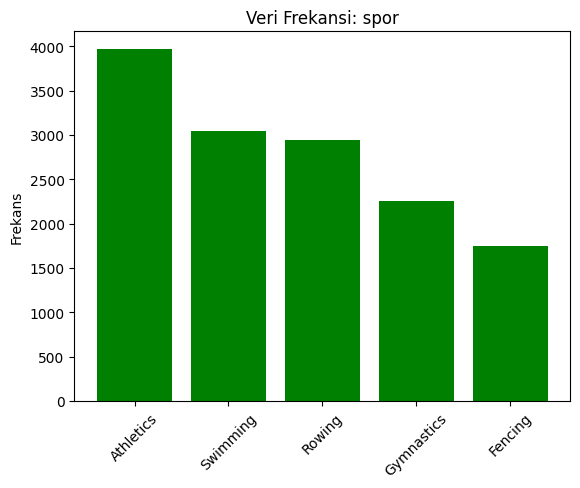

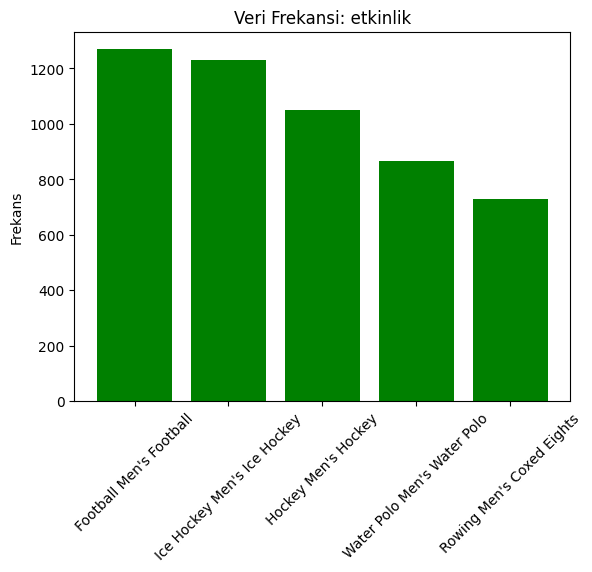

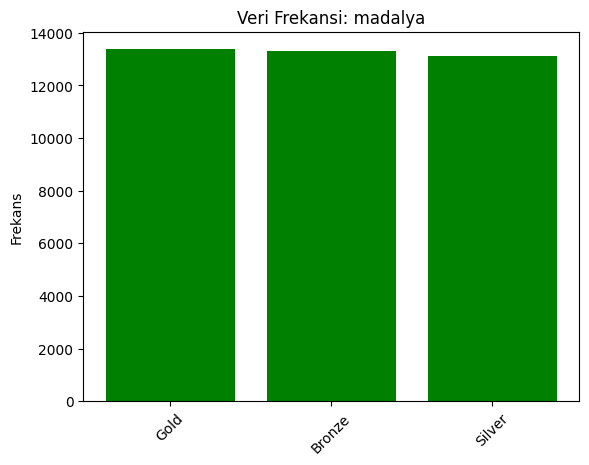

In [29]:
for col in cat_cols:
    plotBar(col)

## 2 Değişkenli Veri Analizi
- 2 değişkenli veri analizi yaparken kazanılan madalyalar ve diğer sütunlar ile arasındaki ilişkileri inceleyeceğiz.
1. Cinsiyete göre boy ve kilo karşılaştırması.
2. Sayısal sütunlar arasındaki ilişki incelenmesi.
3. Madalya ve yaş arasındaki ilişkinin incelenmesi.
4. Takımların kazandıkları altın, gümüş, bronz madalya sayıları
5. Kazanılan madalyaların hangi şehirlerde kazanıldığı.
6. Cinsiyete göre kazanımlar.


#### 1. Cinsiyete göre boy ve kilo karşlaştırılması

In [30]:
erkek = df[df["cinsiyet"]=="M"]
kadin = df[df["cinsiyet"]=="F"]

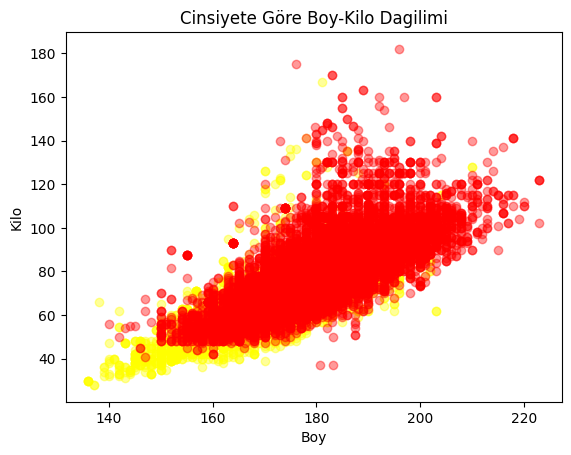

In [31]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, color="yellow", alpha=0.4, label="Kadin")
plt.scatter(erkek.boy, erkek.kilo, color="red", alpha=0.4, label="Erkek")
plt.title("Cinsiyete Göre Boy-Kilo Dagilimi")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

In [32]:
df[["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.062006,0.137650
boy,0.062006,1.000000,0.794279
kilo,0.137650,0.794279,1.000000


#### 2. Yaşa göre Madalya Karşılaştırılması

In [33]:
df_temp = df.copy()
df_temp = pd.get_dummies(df_temp, columns=["madalya"], dtype=int)
df_temp.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.008432,76.694056,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.000000,75.000000,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [34]:
df_temp[["yas", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].corr()
# Değerler 0'a çok yakın dolayısıyla yaşın madalya alma üzerinde bir etkisi yok.

,yas,madalya_Bronze,madalya_Silver,madalya_Gold
yas,1.000000,-0.005585,0.008191,-0.002574
madalya_Bronze,-0.005585,1.000000,-0.496859,-0.504110
madalya_Silver,0.008191,-0.496859,1.000000,-0.499022
madalya_Gold,-0.002574,-0.504110,-0.499022,1.000000


#### 3. Takımların Kazandıkları Altın,Gümeş ve Bronz Madalya Sayıları

In [35]:
df_temp[["takim", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].groupby("takim", as_index=False).sum().sort_values(by="madalya_Gold", ascending=False).head(10)

,takim,madalya_Bronze,madalya_Silver,madalya_Gold
462,United States,1233,1512,2474
403,Soviet Union,677,716,1058
165,Germany,678,627,679
215,Italy,484,508,535
171,Great Britain,572,582,519
149,France,577,518,455
420,Sweden,507,476,451
198,Hungary,365,330,432
67,Canada,408,413,422
117,East Germany,263,309,369


#### 4. Kazanılan Madalyaların Hangi Şehirde Kazanıldığı

In [36]:
df_temp[["sehir", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].groupby("sehir", as_index=False).sum().sort_values(by="madalya_Gold", ascending=False).head(10)

,sehir,madalya_Bronze,madalya_Silver,madalya_Gold
17,London,1214,1195,1215
3,Athina,860,859,883
18,Los Angeles,706,691,726
6,Beijing,710,667,671
27,Rio de Janeiro,703,655,665
38,Sydney,680,661,663
4,Atlanta,629,605,608
5,Barcelona,604,549,559
33,Seoul,549,513,520
2,Antwerpen,367,448,493


#### 5. Cinsiyete Göre Madalya Kazanımları

In [37]:
df_temp[["cinsiyet", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].groupby("cinsiyet", as_index=False).sum().sort_values(by="madalya_Gold", ascending=False).head(10)

,cinsiyet,madalya_Bronze,madalya_Silver,madalya_Gold
1,M,9524,9381,9625
0,F,3771,3735,3747
